### Justice Nii-Ayitey

### STAT517 Preliminary Final Project

### Topic: Vehicle Fuel Economy 

### Supervised Learning-Classification

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
#data visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import Imputer
from missingpy import KNNImputer

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Load Data

In [3]:
veh = pd.read_csv("https://raw.githubusercontent.com/justicejanak/Stat-517/master/vehicles.csv")
veh.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
veh.shape

(39588, 83)

In [5]:
#veh.columns

### Visual Inspection of Data

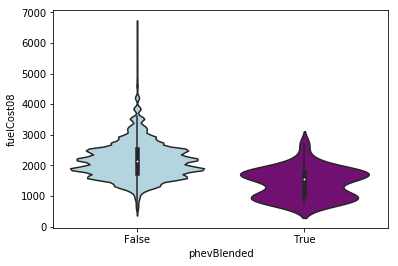

In [6]:
sns.violinplot("phevBlended", "fuelCost08", data=veh,
              palette=["lightblue", "purple"]);

From the plot above,truely vehicles that operate on a blend of gasoline and 
electricity in charge depleting mode (i.e. phevBlended) has 
less annual fuel cost for fuelType1 (i.e.fuelCost08 ) 

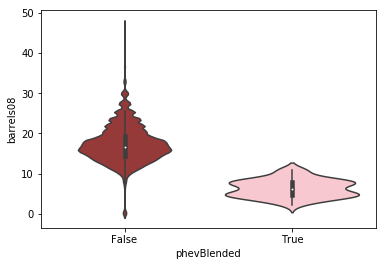

In [7]:
sns.violinplot("phevBlended", "barrels08", data=veh,
              palette=["brown", "pink"]);

Also from the plot above,truely vehicles that operate on a blend of gasoline and electricity in charge depleting mode (i.e. phevBlended) has less annual petroleum consumption in barrels for fuelType1 (i.e.barrels08 )  

### Preprocessing the Dataset

In [8]:
#changing predictor variable phevBlended from "object" type to "category" type.
veh["phevBlended"] = veh["phevBlended"].astype('category')
veh["phevBlended_cat"] = veh["phevBlended"].cat.codes

In [9]:
veh = veh.select_dtypes(include=['uint','int8','int64','float64']).copy()
veh.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb,phevBlended_cat
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,35.0000,0.0,1985,-2250,0.0,0,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,19.0000,0.0,1985,-10500,0.0,0,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,47.0000,0.0,1985,0,0.0,0,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,16.6667,0.0,1985,-10500,0.0,0,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,...,0.0,32.0000,0.0,1993,-5250,0.0,0,0,0,0


### Train and Test Datasets

In [10]:
#phevBlended_cat as the response variables
y_veh=veh['phevBlended_cat']
y_veh.shape

(39588,)

In [11]:
#all variables except phevBlended_cat
X_veh=veh.drop('phevBlended_cat',axis=1)
X_veh.shape

(39588, 59)

In [12]:
X_veh.isna().sum().sum() #determines total number of missing values

330

In [13]:
#Uses KNN as imputation method
imputer = KNNImputer(n_neighbors=1)
X_imputed = imputer.fit_transform(X_veh)
X_imputed = pd.DataFrame(X_imputed) #transforms X_imputed from array to pandas dataframe
X_imputed.columns = X_veh.columns  #sets column index appropriately

In [14]:
X_imputed.isna().sum().sum() #determines total number of missing values after imputation

0

In [15]:
X_veh = X_imputed #renames our imputed dataset
X_veh.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,...,23.3333,0.0,35.0000,0.0,1985.0,-2250.0,0.0,0.0,0.0,0.0
1,29.964545,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,11.0000,0.0,19.0000,0.0,1985.0,-10500.0,0.0,0.0,0.0,0.0
2,12.207778,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,...,29.0000,0.0,47.0000,0.0,1985.0,0.0,0.0,0.0,0.0,0.0
3,29.964545,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,12.2222,0.0,16.6667,0.0,1985.0,-10500.0,0.0,0.0,0.0,0.0
4,17.347895,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,...,21.0000,0.0,32.0000,0.0,1993.0,-5250.0,0.0,0.0,0.0,0.0


In [16]:
#dividing dataset into 25% being testing and 75% being training
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_veh, y_veh,
                                                random_state=1, test_size=0.25)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (29691, 59)
X_test shape: (9897, 59)
y_train shape: (29691,)
y_test shape: (9897,)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### k-Nearest Neighbor


In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [24]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [0 0 0 ... 0 0 0]


In [26]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 1.00


In [28]:
#roc curve
y_model = clf.predict(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_model)
roc_auc_score(y_test,y_model)

0.5453028157357511

### Analyzing KNeighborsClassifier

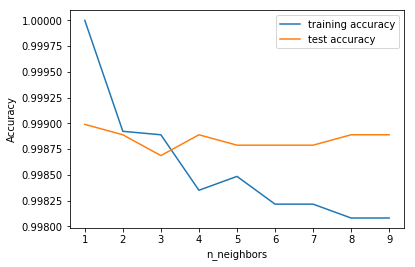

In [29]:
#with a range from 1 to 10, the test accuracy is high when n_neighbors is at 8
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Naive Bayes


In [30]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.99989895928059

In [32]:
#roc curve 
roc_auc_score(y_test,y_model)

0.9999494234270686

### Logistic Regression

In [33]:
#given c=1, c=100, and c=0.01, the test score and roc curse for the logistic regression are approximately the same
logreg = LogisticRegression().fit(X_train, y_train)
y_model = logreg.predict(X_test)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [34]:
#roc curve
roc_auc_score(y_test,y_model)

1.0

In [35]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
y_model = logreg100.predict(X_test)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [36]:
#roc curve
roc_auc_score(y_test,y_model)

1.0

In [37]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
y_model = logreg001.predict(X_test)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [38]:
#roc curve
roc_auc_score(y_test,y_model)

1.0

### Decision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_model = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [40]:
#roc curve
roc_auc_score(y_test,y_model)

1.0

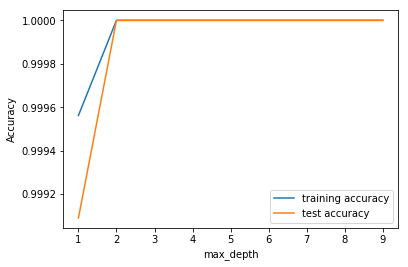

In [41]:
#for a given range from 1 to 10, the test accuracy of the Decision Tree is high when max_depth is at 8
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 10
max_depth_settings = range(1, 10)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_model = forest.predict(X_test)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [45]:
#roc curve
roc_auc_score(y_test,y_model)

1.0

### Neural Networks

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_model = mlp.predict(X_test)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


In [47]:
#roc curve
roc_auc_score(y_test,y_model)

1.0

### Support Vector Machine

In [45]:
#the output of SVC takes sometime

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_model = logreg001.predict(X_test)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


In [47]:
roc_curve
y_model = model.predict(X_test)
roc_auc_score(y_test,y_model)

0.9999494234270686

### Summary

In [48]:
decision=pd.DataFrame({'Model':['k-Nearest Neighbor','Naive Bayes','logreg','logreg100','logreg0.01','Decision Tree','Random Forest',
                              'Neural Networks','SVC'],'Test':[1,1,1,1,1,1,1,1,1],'ROC':[0.52,1,1,1,1,1,1,1,1]})
decision

,Model,ROC,Test
0,k-Nearest Neighbor,0.52,1
1,Naive Bayes,1.00,1
2,logreg,1.00,1
3,logreg100,1.00,1
4,logreg0.01,1.00,1
5,Decision Tree,1.00,1
6,Random Forest,1.00,1
7,Neural Networks,1.00,1
8,SVC,1.00,1


phevBlended (if true, this vehicle operates on a blend of gasoline and electricity in charge depleting mode) is categorical and it was considered as the reponse variable for the classification under supervised learning
From the table above,k-Nearest Neighbor had the lowest ROC of 0.52 
With the exception of k-Nearest Neighbor, all the model had 100% accuracy for both roc and the test score. Hence we can assume any of these models for classifying phevBlended respectivley. 